In [245]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import piplite
await piplite.install("seaborn")
import seaborn as sns
import scipy.stats as st
from scipy.stats import chi2

In [246]:
df = pd.read_csv("数据集.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [247]:
print(df.shape)

(1000, 8)


In [248]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 43.0+ KB


In [249]:
print(df.dtypes)

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object


In [250]:
print(df.isna().sum()) #检查NAN

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


In [251]:
#选出列类型是object的列，并获取列名
obj_cols = df.select_dtypes(include = "object").columns 
print(obj_cols)

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object')


In [252]:
blank_cnt = (df[obj_cols].astype(str).apply(lambda s: (s.str.strip() == "").sum()))
print(blank_cnt)

# .astype(str): 把每个元素强制转成字符串
# 。astype(str)会将NAN变为nan，不会被识别为缺失值,用.astype("string")

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
dtype: int64


In [253]:
for c in obj_cols:
    df[c] = df[c].astype(str).str.strip()
    df.loc[df[c] == "",c] = np.nan

In [254]:
# 检查大小写/空格导致的同义不同写
for c in df.select_dtypes(include = "object").columns:
    raw = df[c].nunique() # 统计c列有多少个不同的值
    norm = df[c].astype(str).str.strip().str.lower().nunique()
    if(norm < raw):
        print("傻逼",c)
# 统一成小写
for c in df.select_dtypes(include = "object").columns:
    df[c] = df[c].str.strip().str.lower()

In [255]:
df["parental level of education"].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [256]:
df["parental level of education"].nunique()
df["parental level of education"].nunique(dropna = False)

6

In [257]:
df["parental level of education"].value_counts()

parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

In [258]:
# 该cell只能运行一次，因为二次运行时parental level of education的元素变成了数值，map找不到key
education_rank = {"some high school":1,"high school":2,"some college":3,
                  "associate's degree":4,"bachelor's degree":5,"master's degree":6}
df["parental level of education"] = df["parental level of education"].map(education_rank)

In [259]:
df["Average Score"] = (df["math score"] + df["reading score"] + df["writing score"])/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Average Score
0,female,group b,5,standard,none,72,72,74,72.666667
1,female,group c,3,standard,completed,69,90,88,82.333333
2,female,group b,6,standard,none,90,95,93,92.666667
3,male,group a,4,free/reduced,none,47,57,44,49.333333
4,male,group c,3,standard,none,76,78,75,76.333333


In [260]:
# wrong: df["High Achiever"] = 1 if df["Average Score"] >=75 else 0
df["High Achiever"] = (df["Average Score"] >= 75).astype(int)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Average Score,High Achiever
0,female,group b,5,standard,none,72,72,74,72.666667,0
1,female,group c,3,standard,completed,69,90,88,82.333333,1
2,female,group b,6,standard,none,90,95,93,92.666667,1
3,male,group a,4,free/reduced,none,47,57,44,49.333333,0
4,male,group c,3,standard,none,76,78,75,76.333333,1


# 第二题

In [261]:
df.groupby("parental level of education")["Average Score"].agg(["count","mean","median","max","min"]).reset_index()

,parental level of education,count,mean,median,max,min
0,1,179,65.108007,66.666667,99.000000,9.000000
1,2,196,63.096939,65.000000,95.666667,18.333333
2,3,226,68.476401,68.666667,99.000000,23.333333
3,4,222,69.569069,69.666667,100.000000,31.666667
4,5,118,71.923729,71.166667,100.000000,39.000000
5,6,59,73.598870,73.333333,97.666667,44.666667


<Figure size 1000x500 with 0 Axes>

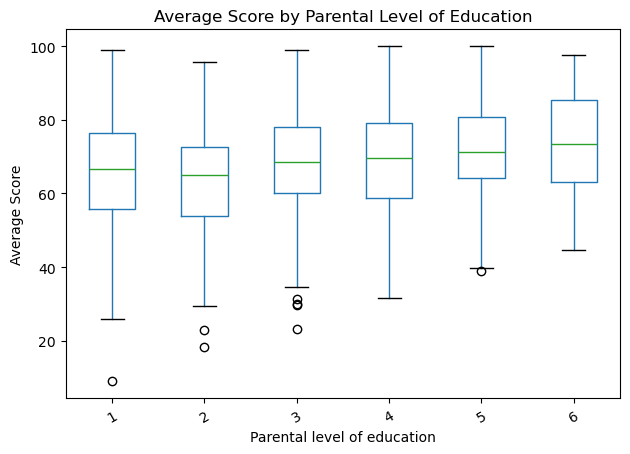

In [262]:
# pd.to_numeric(): 把一列转换为数值
df["Average Score"] = pd.to_numeric(df["Average Score"], errors = "coerce")
plt.figure(figsize = (10, 5))
ax = df.boxplot(column = "Average Score",
               by = "parental level of education",
               grid = False,
               rot = 30)
plt.title("Average Score by Parental Level of Education")
# 去掉pandas自动添加的“超级标题”
plt.suptitle("")
plt.xlabel("Parental level of education")
plt.ylabel("Average Score")
plt.tight_layout()
plt.show()

从该箱线图中，可以得到一下结论：
- 不同教育程度的家庭，最高分数相差无几，但是最低分数在整体上随着教育水平的提高而增加；
- 平均分的中位数整体上随着教育水平的提高而增加；
- 随着教育水平的提高，整体上方差减小。

In [263]:
df.groupby("test preparation course")[["math score","reading score","writing score"]].mean()

,math score,reading score,writing score
test preparation course,,,
completed,69.695531,73.893855,74.418994
none,64.077882,66.534268,64.504673


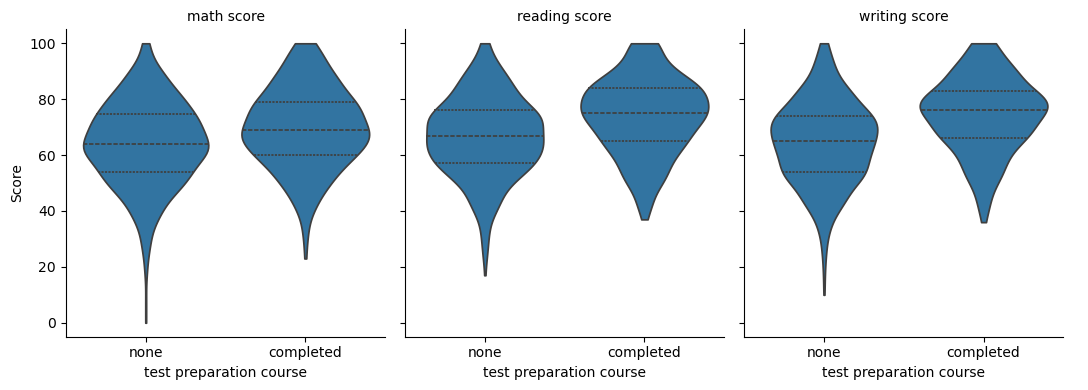

In [264]:
prep_col = "test preparation course"
score_cols = ["math score", "reading score", "writing score"]

df_long = df.melt(
    id_vars = prep_col,
    value_vars = score_cols,
    var_name = "Subject",
    value_name = "Score"
)

g = sns.catplot(
    data=df_long,
    kind="violin",
    col="Subject",
    x=prep_col, y="Score",
    order=["none", "completed"],
    inner="quartile", # 在小提琴内部画出四分位信息
    cut=0,
    sharey=True,
    height=4, aspect=0.9
)
g.set_titles("{col_name}")
plt.show()

In [265]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Average Score,High Achiever
0,female,group b,5,standard,none,72,72,74,72.666667,0
1,female,group c,3,standard,completed,69,90,88,82.333333,1
2,female,group b,6,standard,none,90,95,93,92.666667,1
3,male,group a,4,free/reduced,none,47,57,44,49.333333,0
4,male,group c,3,standard,none,76,78,75,76.333333,1


In [266]:
df_S1 = df.groupby("race/ethnicity")["Average Score"].agg(["count","mean"])
df_S1

,count,mean
race/ethnicity,,
group a,89,62.992509
group b,190,65.468421
group c,319,67.131661
group d,262,69.179389
group e,140,72.752381


In [267]:
df_mean2 = df["Average Score"].mean()
print(df_mean2)

67.77066666666666


In [268]:
df_S1["qq"] = df_S1["count"] * (df_S1["mean"] - df_mean2) * (df_S1["mean"] - df_mean2)
SSB = df_S1["qq"].sum()
print(df_S1)
print(SSB)

                count       mean           qq
race/ethnicity                               
group a            89  62.992509  2031.940062
group b           190  65.468421  1007.063625
group c           319  67.131661   130.256529
group d           262  69.179389   519.938867
group e           140  72.752381  3474.446811
7163.645894922556


In [269]:
df_S2 = df[["race/ethnicity","Average Score"]]
df_S2

,race/ethnicity,Average Score
0,group b,72.666667
1,group c,82.333333
2,group b,92.666667
3,group a,49.333333
4,group c,76.333333
...,...,...
995,group e,94.000000
996,group c,57.333333
997,group c,65.000000
998,group d,74.333333


In [270]:
SSW = df_S2.groupby("race/ethnicity").apply(lambda d: ((d["Average Score"] - d["Average Score"].mean())**2).sum()).sum()
print(SSW)

<ipython-input-270-12564d0123d9>:1: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  SSW = df_S2.groupby("race/ethnicity").apply(lambda d: ((d["Average Score"] - d["Average Score"].mean())**2).sum()).sum()


195904.42699396634


In [271]:
MSB = SSB/(5-1)
MSW = SSW/(1000 - 5)
F = MSB/MSW
print(F)

9.096052313390897


In [272]:
p = st.f.sf(F,4,995)
print(p)

3.2258693161040875e-07


- F = 9.096052313390897
- p = 3.2258693161040875e-07
- 结论：在常用显著性水平0.05下，种族分组的平均分存在统计显著差异

In [273]:
grouped = df.groupby("race/ethnicity")["Average Score"]
samples = [s.to_numpy() for _,s in grouped]
labels = [k for _,k in grouped]
res = st.f_oneway(*samples)
print("F = ", res.statistic)
print("p = ",res.pvalue)

F =  9.09605231339089
p =  3.2258693161040875e-07


# 第三题

In [274]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Average Score,High Achiever
0,female,group b,5,standard,none,72,72,74,72.666667,0
1,female,group c,3,standard,completed,69,90,88,82.333333,1
2,female,group b,6,standard,none,90,95,93,92.666667,1
3,male,group a,4,free/reduced,none,47,57,44,49.333333,0
4,male,group c,3,standard,none,76,78,75,76.333333,1


In [275]:
df.groupby("gender")[["math score", "reading score", "writing score"]].mean()

,math score,reading score,writing score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


<Figure size 1000x500 with 0 Axes>

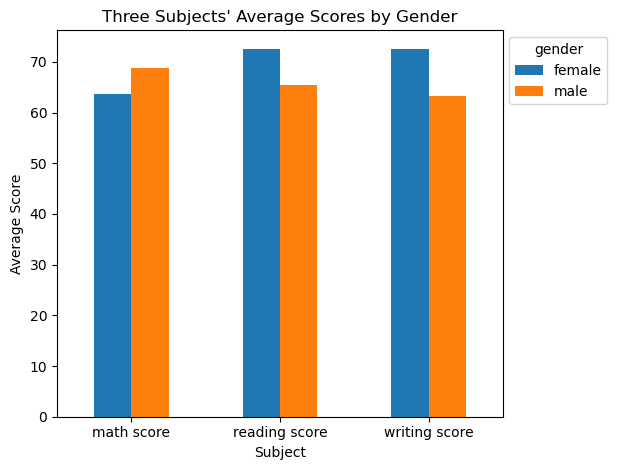

In [276]:
cols = ["math score","reading score","writing score"]
mean_by_gender = df.groupby("gender")[cols].mean()
mean_by_gender = mean_by_gender.reindex(["female","male"]) #固定显示顺序，避免顺序随机

# 转置
plot_df = mean_by_gender.T

plt.figure(figsize = (10,5))
ax = plot_df.plot(
    kind = "bar",
    grid = False,
    rot = 0
)
ax.legend(
    title = "gender",
    loc = "upper right",
    bbox_to_anchor = (1.25, 1)
)
plt.title("Three Subjects' Average Scores by Gender")
plt.xlabel("Subject")
plt.ylabel("Average Score")
plt.tight_layout()
plt.show()

- 男生在数学科目（理科）上占优；女生在阅读和写作科目（文科）上占优。

In [277]:
df["文科分"] = (df["reading score"] + df["writing score"])/2
df["理科分"] = df["math score"]/1
df["文科better"] = (df["文科分"] > df["理科分"]).astype(int)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Average Score,High Achiever,文科分,理科分,文科better
0,female,group b,5,standard,none,72,72,74,72.666667,0,73.0,72.0,1
1,female,group c,3,standard,completed,69,90,88,82.333333,1,89.0,69.0,1
2,female,group b,6,standard,none,90,95,93,92.666667,1,94.0,90.0,1
3,male,group a,4,free/reduced,none,47,57,44,49.333333,0,50.5,47.0,1
4,male,group c,3,standard,none,76,78,75,76.333333,1,76.5,76.0,1


In [278]:
Better = df.groupby("gender")["文科better"].sum().to_frame()
Gender_count = df["gender"].value_counts()
Better["count"] = Gender_count
Better["文科好的比例"] = Better["文科better"]/Better["count"]

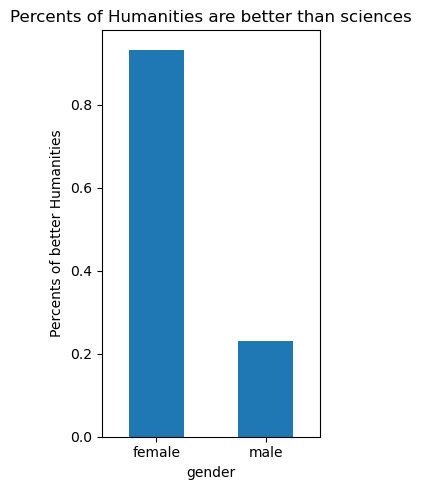

In [279]:
plt.figure(figsize = (3,5))
ax = Better["文科好的比例"].plot(
    kind = "bar",
    grid = False,
    rot = 0
)
plt.title("Percents of Humanities are better than sciences")
plt.xlabel("gender")
plt.ylabel("Percents of better Humanities")
plt.tight_layout()
plt.show()

In [280]:
Better["理科better"] = Better["count"] - Better["文科better"]
Better

,文科better,count,文科好的比例,理科better
gender,,,,
female,483,518,0.932432,35
male,111,482,0.230290,371


### 通过计算卡方来分析相关性

In [282]:
Ef1 = 518 * (483+111)/1000 #女生文科好的期望
Ef2 = 518 * (35+371)/1000 #女生理科好的期望
Em1 = 482 * (483+111)/1000 #男生文科好的期望 
Em2 = 482 * (35+371)/1000 #男生理科好的期望

X2 = (483 - Ef1)**2/Ef1 + (35 - Ef2)**2/Ef2 + (111 - Em1)**2/Em1 + (371 - Em2)**2/Em2
p_value = chi2.sf(X2,1)
p_value

np.float64(5.1794551685539204e-113)

- 由于p_value极小（<0.05），说明性别与文理科p